In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *

%matplotlib inline

In [3]:
# abrindo os dados
df = pd.read_csv('../dados_meteorologicos/dataframe_ML_8unit.csv')

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['aspect'],axis=1)

In [5]:
df.head()

,t2_5km,usodosolo,elevacao,slope,ndvi,evi,t2_1km,aspect_LE,aspect_NS
0,293.861,2.0,530,3.825599,7881,4294,292.852,0.983365,-0.181639
1,293.861,2.0,610,3.327508,8178,3931,293.374,-0.952633,-0.304123
2,293.861,2.0,551,15.256382,6945,4890,293.502,0.075479,0.997147
3,293.861,2.0,335,14.086095,7983,6046,294.146,0.464312,-0.885671
4,295.679,2.0,434,9.051502,7665,5841,295.056,-0.701476,-0.712693


In [6]:
# preparandos os conjuntos de dados
from sklearn.preprocessing import LabelEncoder, Binarizer, MultiLabelBinarizer

from sklearn.preprocessing import StandardScaler


In [7]:
bina = MultiLabelBinarizer()
usodosolo = bina.fit(df.usodosolo.values.reshape(-1,1)).transform(df.usodosolo.values.reshape(-1,1))

In [8]:
#
Y = df.t2_1km.values
X = df[['t2_5km','elevacao','ndvi','evi','slope','aspect_LE','aspect_NS']].values

In [9]:
stander = StandardScaler()
X = stander.fit(X).transform(X)

In [10]:
X = np.hstack((X,usodosolo))

In [45]:
X

array([[-1.91507586,  3.48608098,  0.99897251, ...,  0.        ,
         0.        ,  0.        ],
       [-1.91507586,  4.08415087,  1.09025931, ...,  0.        ,
         0.        ,  0.        ],
       [-1.91507586,  3.64307432,  0.71128077, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.82379959, -0.46118027, -1.42335504, ...,  0.        ,
         0.        ,  1.        ],
       [-0.82379959, -0.44622853, -1.42335504, ...,  0.        ,
         0.        ,  1.        ],
       [-0.82379959, -0.44622853, -1.42335504, ...,  0.        ,
         0.        ,  1.        ]])

In [46]:
# dividindo conjunto de dados
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25, random_state=42)

# avaliando no data

In [23]:
#from feature_selector import FeatureSelector



In [24]:
#fs = FeatureSelector(data = df, labels= df.columns)

In [109]:
fs.identify_missing(missing_threshold=0.2)

0 features with greater than 0.20 missing values.



In [25]:
#fs.missing_stats.head()

In [14]:

#fs.plot_missing()

In [56]:
#fs.identify_collinear(correlation_threshold=0.1)

5 features with a correlation magnitude greater than 0.10.



In [104]:
# fs.plot_collinear(plot_all=True)
# plt.xticks(fontsize = 16)
# plt.yticks(rotation = 'horizontal',fontsize = 16)

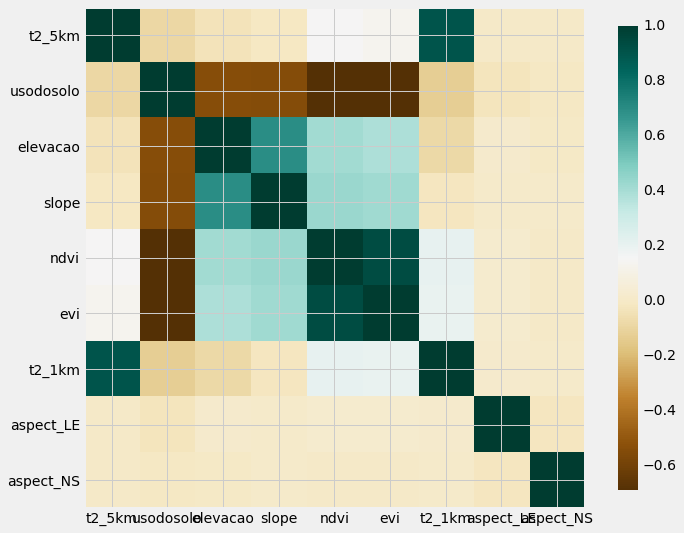

In [48]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
plt.imshow(df.corr(),cmap='BrBG')
plt.yticks(np.arange(9),df.columns)
plt.xticks(np.arange(9),df.columns)
plt.colorbar(shrink = 0.8)

In [87]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

## Treinando os modelos

In [15]:
import time

In [50]:
# importando bibliotecas
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [20]:
# cria dicionario com os algorimos utilizados 
ESTIMATORS = {    
    #"K-nn": KNeighborsRegressor(),                        
    "RandomForestRegressor": RandomForestRegressor(max_depth=50, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
   # "SVC":SVR(),
    #"NeuralNetwork": MLPRegressor(solver='adam', random_state=1,
     #                             hidden_layer_sizes=(4,4,4,2)),
    "GBR" :GradientBoostingRegressor(n_estimators=35),
    "AdaB" :AdaBoostRegressor(n_estimators=5)
}

NameError: name 'RandomForestRegressor' is not defined

In [52]:
Tii = time.clock()
# aplicando os algortimos
y_test_predict = dict()
y_mse = dict()
y_r2 = dict()
tempro = dict()
#fig = plt.figure(figsize=(15,10))
i=1
for name, estimator in ESTIMATORS.items():
    Ti = time.clock()
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = previsao = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(X_test))
    y_r2[name] = estimator.score(X_test,y_test)
    Tf = time.clock()    
    tempro[name] = Tf - Ti
    print(name + ' Concluido')
    #grafico
#     z= np.polyfit(y_test.flatten(),previsao.flatten(),1)
#     p=np.poly1d(z)
#     ax=fig.add_subplot(2,3,i)
#     ax.scatter(y_test,previsao,color='k',marker='+')
#     ax.set_xlabel('Observado')
#     ax.set_ylabel('Estimado')
#     ax.set_title(name)
#     ax.plot(y_test,p(y_test),'r--')
#     i+=1

# plt.tight_layout()
# #plt.savefig('../../../Qualificacao/MML_evaporacao_INMET.png')
# plt.show()

    

Resultados=pd.DataFrame({'mse':list(y_mse.values()),    # Padronizando o os dois
                 'R2':list(y_r2.values()),
               'Tempo':list(tempro.values())},               
                index=list(y_r2.keys()))

Tff = time.clock()

print(Tff - Tii)

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_count

RandomForestRegressor Concluido


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Decision Tree Regressor Concluido


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


GBR Concluido
AdaB Concluido
11.702069999999821


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [53]:
Resultados

,mse,R2,Tempo
RandomForestRegressor,0.777385,0.946042,6.267914
Decision Tree Regressor,1.834121,0.872695,0.269433
GBR,1.727409,0.880102,4.230212
AdaB,2.279280,0.841797,0.932331


In [18]:
Resultados

,mse,R2,Tempo
K-nn,1.471229,0.895487,206.584040
RandomForestRegressor,0.733927,0.947864,4.638899
Decision Tree Regressor,1.857161,0.868072,0.167279
SVC,1.769732,0.874282,813.335483
GBR,1.740585,0.876353,3.305073
AdaB,2.209180,0.843065,0.602542


# Random forest

In [54]:
# Random forest
Ti = time.clock()

rf = RandomForestRegressor(max_depth=50, random_state=50,n_estimators=100,max_features='auto')
rf.fit(X_train,y_train)
r2 = rf.score(X_test,y_test)

Tf = time.clock()
print(Tf -Ti)

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


62.27707999999984


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [60]:
rf.score(X_test,y_test)

0.9522108412190108

In [61]:
# export random forest
from sklearn.externals import joblib
joblib.dump(rf,'../modelos/rf_wrf.pk1')
RandomForest = joblib.load('../modelos/rf_wrf.pk1')

In [62]:
RandomForest.score(X_test,y_test)

0.9522108412190108

In [21]:
# t1 = time.clock()
# max_depth = [10, 30, 50,100]
# n_estimators = [ 5,30,50, 100,]
# r2L= dict()
# tempo = dict()
# for i in range(len(max_depth)):
#     for x in range(len(n_estimators)):
#         t3 = time.clock()
#         rf = RandomForestRegressor(max_depth=max_depth[i],n_estimators = n_estimators[x])
#         rf.fit(X_train,y_train)
#         r2L[str(max_depth[i])+'-'+str(n_estimators[x])] = rf.score(X_test,y_test)
#         print(rf.score(X_test,y_test))
#         t4 = time.clock()
#         print(t4 -t3)
#         tempo[str(max_depth[i])+'-'+str(n_estimators[x])] = t4 - t3

# r2RF = pd.DataFrame({'R2':list(r2L.values()), 
#                     'tempo':list(tempo.values())},
#                     index=list(r2L.keys()))

# t2 =time.clock()

# print( t2-t1)

In [19]:
# r2RF = pd.DataFrame({'R2':list(r2L.values()), 
#                     'tempo':list(tempo.values())},
#                     index=list(r2L.keys()))

In [43]:
r2RF[r2RF['R2']>0.95]

,R2,tempo
30-30,0.952016,12.854705
30-50,0.953052,18.382357
30-100,0.953550,40.369404
50-30,0.952390,11.036777
50-50,0.953460,20.050030
50-100,0.953547,38.987148
100-30,0.951906,11.498152
100-50,0.953054,18.795295
100-100,0.953498,36.454423


# Gradient boosting 

In [116]:
# N_estimators 

t1 = time.clock()
max_depth = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
#n_estimators = [  4000 , 4500, 5000, 5500, 6000 ]#[ 20,30,50,100,250,500]
r2L= dict()
tempo = dict()
for i in range(len(max_depth)):    
    t3 = time.clock()
    rf = GradientBoostingRegressor(learning_rate= max_depth[i])
    rf.fit(X_train,y_train)
    r2L[str(max_depth[i])] = rf.score(X_test,y_test)
    print(rf.score(X_test,y_test))
    t4 = time.clock()
    print(t4 -t3)
    tempo[str(max_depth[i])] = t4 - t3

r2GBd = pd.DataFrame({'R2':list(r2L.values()), 
                    'tempo':list(tempo.values())},
                    index=list(r2L.keys()))

t2 =time.clock()

print( t2-t1)

In [14]:
# plt.style('fivethirtyeight')
# r2GBd.R2.plot(style='--')

In [63]:
#max depths

t1 = time.clock()
model = GradientBoostingRegressor(learning_rate=1,n_estimators= 4000)
model.fit(X_train,y_train)
t2 = time.clock()
print( t2-t1)

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


424.590557


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [64]:
model.score(X_test,y_test)

0.9715224559786184

In [65]:
joblib.dump(model,'../modelos/GradB_wrf.jk1')

['../modelos/GradB_wrf.jk1']

In [66]:
GradB = joblib.load('../modelos/GradB_wrf.jk1')

In [67]:
GradB.score(X_test,y_test)

0.9715224559786184

In [17]:
# N_estimators 

# t1 = time.clock()
# max_depth = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# #n_estimators = [  4000 , 4500, 5000, 5500, 6000 ]#[ 20,30,50,100,250,500]
# r2L= dict()
# tempo = dict()
# for i in range(len(max_depth)):
#     for x in range(len(n_estimators)):
#         t3 = time.clock()
#         rf = GradientBoostingRegressor(learning_rate= max_depth[i], n_estimators = n_estimators[x])
#         rf.fit(X_train,y_train)
#         r2L[str(max_depth[i])+'-'+str(n_estimators[x])] = rf.score(X_test,y_test)
#         print(rf.score(X_test,y_test))
#         t4 = time.clock()
#         print(t4 -t3)
#         tempo[str(max_depth[i])+'-'+str(n_estimators[x])] = t4 - t3

# r2GBd = pd.DataFrame({'R2':list(r2L.values()), 
#                     'tempo':list(tempo.values())},
#                     index=list(r2L.keys()))

# t2 =time.clock()

# print( t2-t1)

In [73]:
r2GBd 

,R2,tempo
1-2000,0.968210,237.806159
1-2500,0.969631,334.127959
1-3000,0.970189,378.929803
1-3500,0.970607,299.709820
1-4000,0.971010,331.314514


In [18]:
#R2GB = pd.concat([R2GB,r2GBd.loc['1-2500':]])


In [79]:
R2GB

,R2,tempo
1-100,0.906160,9.628947
1-250,0.928479,22.327168
1-500,0.946226,42.314013
1-900,0.958085,106.738674
1-1000,0.960200,122.014500
1-1100,0.961735,135.202303
1-1300,0.964167,156.185572
1-1500,0.965662,180.794670
1-2000,0.968201,271.411002
1-2500,0.969631,334.127959


# SVM

In [11]:
import time
from sklearn.svm import SVR

In [68]:
t1 =time.clock()
model = SVR()
model.fit(X_train,y_train)

t2 =time.clock()
print(t2-t1)

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
/home/rafael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


475.49669300000005


/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [69]:
model.score(X_test,y_test)

0.8808798434251867

In [70]:
joblib.dump(model,'../modelos/SVR_wrf_2.pk')

['../modelos/SVR_wrf_2.pk']

# Resultados

In [17]:
import rasterio as rio
from matplotlib import colors

### Importando dados

In [21]:
# modelo digital de elevacao
mde = rio.open('../MDE/srtm_90_1km.tif')
mde_1km = mde.read()[0]
slope = rio.open('../MDE/slope_red.tif').read()[0]
aspect = rio.open('../MDE/aspecto_red.tif').read()[0]
aspect_LE = np.cos(aspect)
aspect_SN = np.sin(aspect)



#indices de vegetacao
ndvi = rio.open('../IV/ndvi.tif')
evi = rio.open('../IV/evi.tif')
ndvi_1km = ndvi.read()[0]
evi_1km = evi.read()[0]

#uso do solo
uso_solo = opengrad('../WRF/grades/usodosolo.csv',3)
uso_solo_1km = uso_solo[:60,:70]



In [22]:
# Temperaturas para o dia 17/12/2017 12:00h
grid1 = opengrad('../WRF/grades/d2_t2_40.csv',2)
grid2 = opengrad('../WRF/grades/d3_t2_40.csv',3)

# pre processamento

In [23]:
grid1_red = dimen(grid1[:12,:14],5)
grid2_red = grid2[:60,:70]

In [24]:
df.columns

Index(['t2_5km', 'usodosolo', 'elevacao', 'slope', 'ndvi', 'evi', 't2_1km',
       'aspect_LE', 'aspect_NS'],
      dtype='object')

In [25]:
df_2 = pd.DataFrame({'t2_5km':grid1_red.flatten(),'usodosolo':uso_solo_1km.flatten(),
                  'elevacao':mde_1km.flatten(),'slope':slope.flatten(), 'ndvi':ndvi_1km.flatten(),
                     'evi':evi_1km.flatten(),'t2_1km':grid2_red.flatten(),'aspect_LE':aspect_LE.flatten(),
                     'aspec_NS':aspect_SN.flatten()
                    })

In [26]:
#df_2.to_csv('../dados_meteorologicos/dataframe_wrf40_8unit.csv')

In [28]:
#df_2DropNa.isnull().sum()

In [30]:
df_2DropNa = df_2.fillna(0)

In [31]:
bina = MultiLabelBinarizer()
usodosolo = bina.fit(df_2DropNa.usodosolo.values.reshape(-1,1)).transform(df_2DropNa.usodosolo.values.reshape(-1,1))

In [32]:
#
Y = df_2DropNa.t2_1km.values
X = df_2DropNa[['t2_5km','elevacao','ndvi','evi','slope','aspect_LE','aspec_NS']].values

In [33]:
stander = StandardScaler()
X = stander.fit(X).transform(X)

In [34]:
X = np.hstack((X,usodosolo))

# Dados

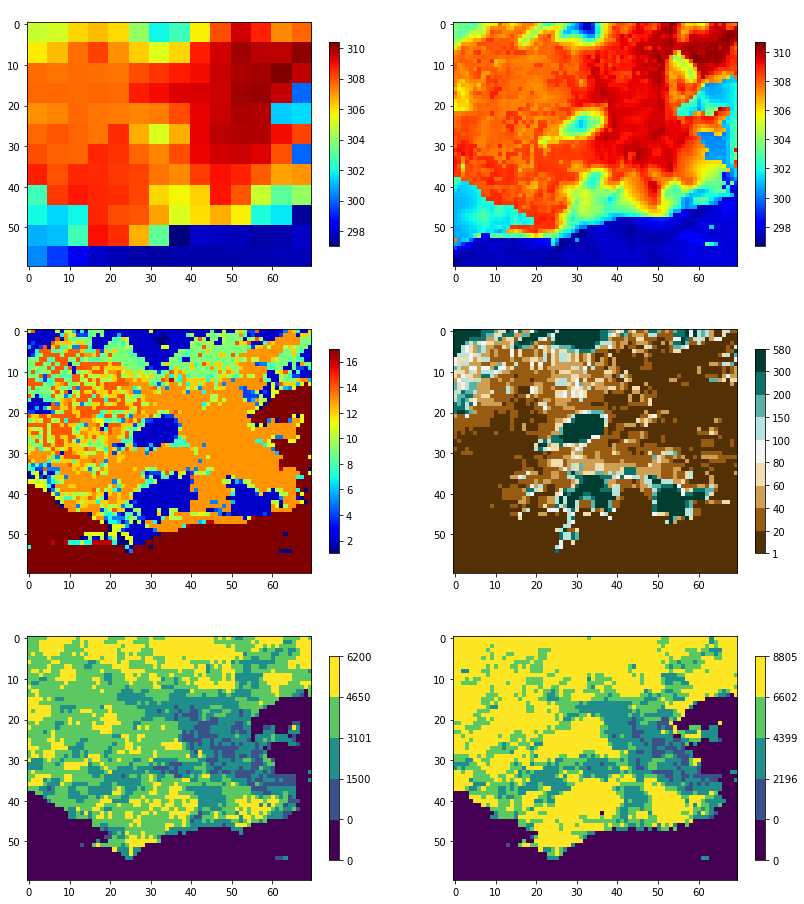

In [35]:
# plotando dados
plt.figure(figsize=(14,16))

plt.subplot(3,2,1)
plt.imshow(grid1_red,cmap='jet')
title_obj = plt.title('Temperatura - 5 km (k)',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

plt.subplot(3,2,2)
plt.imshow(grid2_red, cmap='jet')
title_obj = plt.title('Temperatura - 1 km(k)',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

plt.subplot(3,2,3)
plt.imshow(uso_solo_1km, cmap='jet')
title_obj = plt.title('Uso do solo',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

plt.subplot(3,2,4)
bounds=[1,20,40,60,80, 100, 150,200 ,300 , 580 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(mde_1km,cmap='BrBG',norm=norm)
title_obj = plt.title('Elevacao (m)',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

plt.subplot(3,2,5)
bounds=[0,0.1,1500,3101,4650,6200]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(evi_1km,norm=norm)
title_obj = plt.title('EVI',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

plt.subplot(3,2,6)
bounds=[0,0.1,2196,4399,6602,8805 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(ndvi_1km,norm=norm)
title_obj = plt.title('NDVI',)#get the title property handler
plt.setp(title_obj, color='w')
plt.colorbar(shrink = 0.8)

## Aplicando modelos

In [15]:
from sklearn.externals import joblib

In [42]:
#Knn = joblib.load('../modelos/knn_wrf.pk')
SVRmodel = joblib.load('../modelos/SVR_wrf_2.pk')
RandomForest = joblib.load('../modelos/rf_wrf.pk1')


In [111]:
X_test.shape

(24650, 22)

In [36]:
SVRmodel.score(X,Y)

-0.13388761927132098

In [40]:
#x_knn = Knn.predict(X)
x_svr = SVRmodel.predict(X)


In [43]:
x_rf = RandomForest.predict(X)
#x_gb = GradB.predict(X)


In [51]:
from sklearn.metrics import mean_squared_error

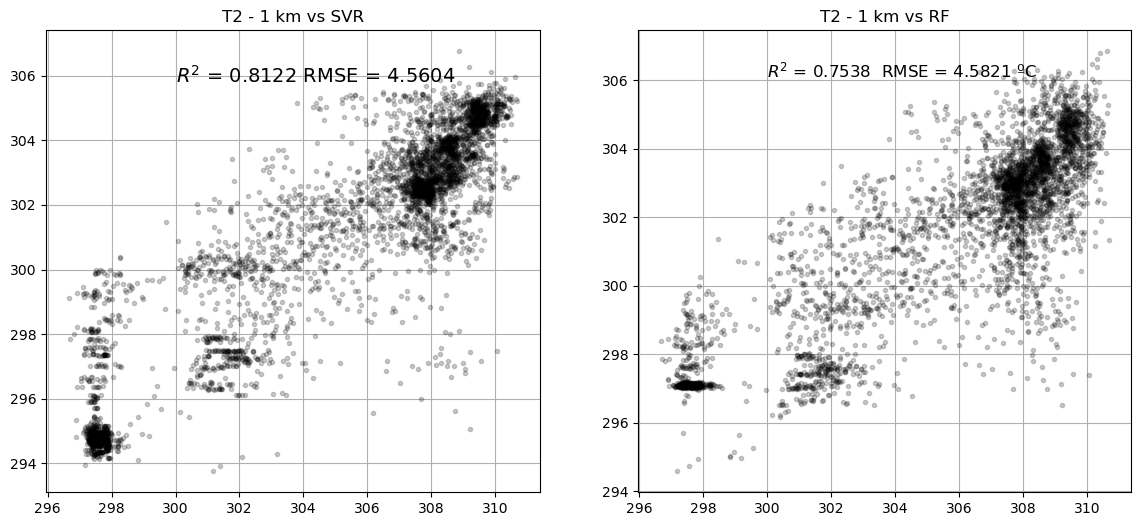

In [88]:
plt.figure(figsize=(14,6))


plt.subplot(1,2,1)
plt.plot(Y,x_svr,'.k', alpha= 0.2)
title_obj = plt.title('T2 - 1 km vs SVR',)
plt.grid()
plt.setp(title_obj, color='k')
plt.text(300.0, 306.0, 
         r'$R^2$'+' = %0.4f' %(np.corrcoef(x_svr,Y)[0,1])**2 +' ' r'RMSE'+' = %0.4f'  %np.sqrt(mean_squared_error(x_svr,Y)),
 horizontalalignment='left',
 verticalalignment='center',fontsize = 14
        )

# plt.subplot(2,2,2)
# plt.plot(Y,x_knn,'.k')
# title_obj = plt.title('T2 - 1 km vs Knn',)
# plt.grid()
# plt.setp(title_obj, color='k')
# plt.text(300.0, 308.0, r'$R^2$'+' = %0.4f' %(np.corrcoef(x_knn,Y)[0,1])**2,
#  horizontalalignment='center',
#  verticalalignment='center',fontsize = 14
#         )


# plt.subplot(2,2,3)
# plt.plot(Y,x_gb,'.k')
# title_obj = plt.title('T2 - 1 km vs GDB',)
# plt.grid()
# plt.setp(title_obj, color='k')
# plt.text(300.0, 306.0, r'$R^2$'+' = %0.4f' %(np.corrcoef(x_gb,Y)[0,1])**2,
#  horizontalalignment='center',
#  verticalalignment='center',fontsize = 14
#         )


plt.subplot(1,2,2)
plt.plot(Y,x_rf,'.k', alpha = 0.2)
title_obj = plt.title('T2 - 1 km vs RF',)
plt.grid()
plt.setp(title_obj, color='k')
plt.text(300.0,306.0, 
         r'$R^2$ = '+'%0.4f' %(np.corrcoef(x_rf,Y)[0,1])**2 + r'  RMSE ='+' %0.4f ºC'  %np.sqrt(mean_squared_error(x_rf,Y)),
 horizontalalignment='left',
 verticalalignment='bottom',fontsize = 12
        )

plt.savefig('../graficos/MML_scater.png')

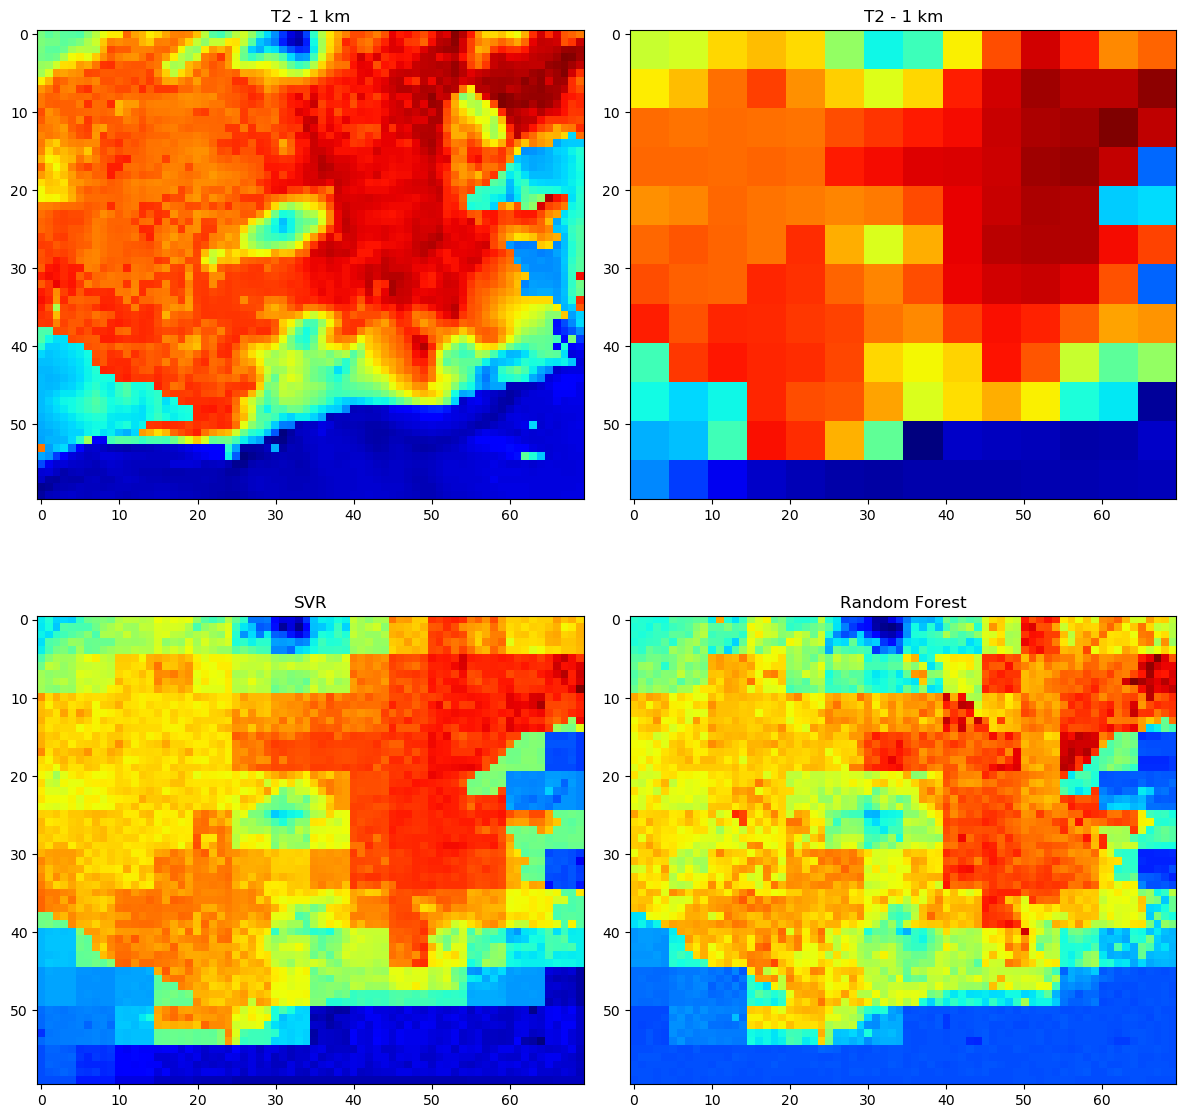

In [49]:
plt.style.use('default')
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(Y.reshape(60,70), cmap='jet')
title_obj = plt.title('T2 - 1 km',)
plt.setp(title_obj, color='k')

plt.subplot(2,2,2)
plt.imshow(grid1_red.reshape(60,70), cmap='jet')
title_obj = plt.title('T2 - 1 km',)
plt.setp(title_obj, color='k')


plt.subplot(2,2,3)
plt.imshow(x_svr.reshape(60,70), cmap='jet')
title_obj = plt.title('SVR',)
plt.setp(title_obj, color='k')

# plt.subplot(3,2,4)
# plt.imshow(x_knn.reshape(60,70), cmap='jet')
# title_obj = plt.title('KNN',)
# plt.setp(title_obj, color='w')


# plt.subplot(3,2,5)
# plt.imshow(x_gb.reshape(60,70), cmap='jet')
# title_obj = plt.title('GDB',)
# plt.setp(title_obj, color='k')

plt.subplot(2,2,4)
plt.imshow(x_rf.reshape(60,70), cmap='jet')
title_obj = plt.title('Random Forest',)
plt.setp(title_obj, color='k')


plt.tight_layout()

plt.savefig('../graficos/MML_spacia.png')


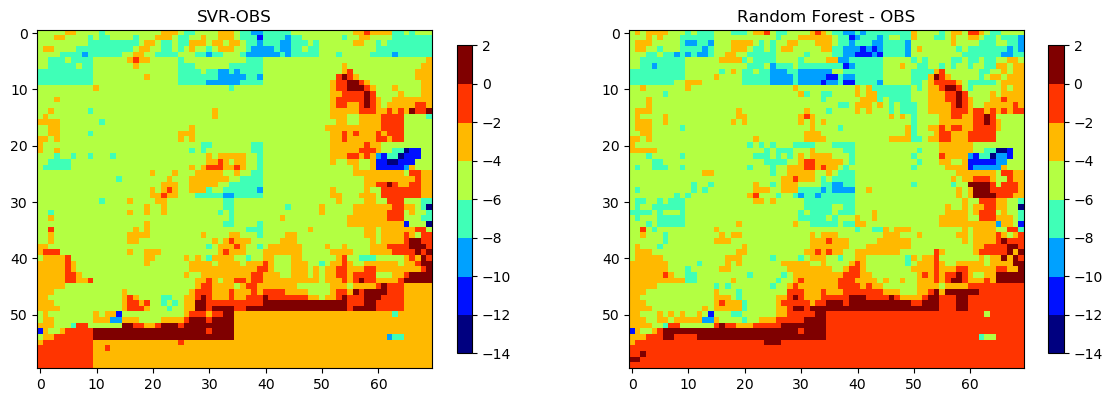

In [93]:
#plt.style.use('fivethirtyeight')
ax= plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
bounds=np.arange(-14,4,2)
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow((x_svr-Y).reshape(60,70),norm=norm,cmap='jet')
plt.colorbar(shrink=0.4)
title_obj = plt.title('SVR-OBS',)
plt.setp(title_obj, color='k')


# plt.subplot(2,2,2)
# bounds=np.arange(-14,4,2)
# norm = colors.BoundaryNorm(bounds, ncolors=256)
# plt.imshow((x_knn-Y).reshape(60,70),norm=norm, cmap='jet')
# title_obj = plt.title('KNN - Y',)
# plt.colorbar(shrink=0.8)
# plt.setp(title_obj, color='w')


# plt.subplot(2,2,3)
# bounds=np.arange(-14,4,2)
# norm = colors.BoundaryNorm(bounds, ncolors=256)
# plt.imshow((x_gb-Y).reshape(60,70),norm=norm,cmap='jet')
# plt.colorbar(shrink=0.8)
# title_obj = plt.title('GDB-OBS',)
# plt.setp(title_obj, color='k')


plt.subplot(1,2,2)
bounds=np.arange(-14,4,2)
norm = colors.BoundaryNorm(bounds, ncolors=256)
im = plt.imshow((x_rf-Y).reshape(60,70),norm=norm, cmap='jet')
title_obj = plt.title('Random Forest - OBS',)
plt.colorbar(shrink=0.4)
plt.setp(title_obj, color='k')

plt.savefig('../graficos/MML_diferenca.png')



In [72]:
#plota grades do dom 2 e 3 
def plot_t2(imagem, d):                       # d = 2 dominio 3 , 3 dominio 3
    plt.figure(figsize=(14,12))
    plt.imshow(imagem,cmap='jet',)
    if d == 2:
        plt.xticks(np.linspace(0,14,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),fontsize = 16)
        plt.yticks(np.linspace(0,12,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 16)
    if d == 3:
        plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),fontsize = 16)
        plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 16)

    #plt.colorbar(shrink=0.8).set_label(label='Temperatura K',size=15,weight='bold')

    b = plt.colorbar(shrink=0.8)
    b.set_label(label='Temperatura K',size=15,weight='bold')

    for l in b.ax.yaxis.get_ticklabels():
        l.set_family("Times New Roman")
        l.set_size(14)

        
# cria a grade                                 # d = idem func anterior 
def opengrad(arquiv, d=3):
    grid = np.loadtxt(arquiv)
    if d == 2: 
        imagem = grid.reshape(13,15)   # dim 15 x 13
    if d == 3:
        imagem = grid.reshape(61,71)   # 61 x 71
    imagem = np.rot90(imagem,2)
    imagem = np.flip(imagem,1)
    return imagem
 

# redimensiona dominio de array a para d subdivisoes da celula
def dimen(a,d):     
    l = len(a[0])*d
    ar = np.zeros(l)
    for i in range(len(a)):
        L = np.repeat(a[i],d)
        for x in range(d):
            ar = np.vstack((ar,L))#np.concatenate((ar,L))
    return ar[1:]

    